# IN2110 obligatorisk innlevering 1a
**Våren 2023**

Det er en god idé å lese gjennom hele oppgavesettet før du setter i gang.
Dersom du har spørsmål så kan du:
- gå på gruppetime,
- spørre på  Discourse (https://in2110-discourse.uio.no/)
- eller sende epost til in2110-hjelp@ifi.uio.no dersom alternativene over av en eller annen grunn ikke passer for spørsmålet ditt.

## Oppsett
Når du har klonet dette github-repoet som denne notebooken ligger i, har du tilgang til datene og hjelpefilene som ligger i denne mappa. Hvis du ønsker å kopiere denne mappa, "1a", over til et annet sted, så skulle det gå bra. Bare pass på at du følger med på om det er oppdateringer her i repoet som gir ut obligen. Når du har aktivert in2110-miljøet med conda, så har du tilgang til pakkene som trengs for å kjøre denne notebooken.

## Bakgrunn
For denne innleveringen skal vi jobbe med datasettet Norwegian Review Corpus
(NoReC) som består av anmeldelser hentet fra en rekke norske nettaviser.
NoReC består av over 35.000 dokumenter fordelt på 9 tematiske kategorier. I dataene som er klargjort for oppgaven, er to av kategoriene fjernet for å spare plass. Vi skal kun se på 3 av de gjenstående kategoriene: ‘games’, ‘restaurants’ og ‘literature’. I oppgavene som følger skal vi skal jobbe med å *(i)* pre-prosessere tekstene, *(ii)* representere dem i en vektorrom-modell og så *(iii)* lage en klassifikator for å predikere hvilken kategori en gitt anmeldelse tilhører.

## Datagrunnlaget
Når vi jobber med klassifikasjon er det viktig at vi setter til side en del av
dokumentene slik at vi kan bruke disse til å evaluere klassifikatoren. NoReC er
delt i tre deler: ‘train’, ‘dev’ og ‘test’. Det er god praksis å trene med treningssettet
(‘train’), evaluere underveis med valideringssettet (‘dev’ for *development*)
og spare testsettet (‘test’) helt til slutt. Tekstene i NoReC er sortert på forhånd for å splittes i  ‘train’, ‘dev’ og ‘test’. Informasjonen om hvilken split dokumentet tilhører, ligger i metadata for hvert dokument. Slik dataene er lagret, er det en liste av dict- én for hvert dokument. Under nøkkelen "text" ligger teksten i dokumentet, og under nøkkelen "metadata" ligger en ny dict der vi kan finne kategorien til dokumentet, og hvilken split det tilhører. 


## Innleveringsformatet
Innleveringen skal helst bestå av én Jupyter notebook med både kode og tilhørende forklaringer. **La det siste du gjør før innlevering være å kjøre hele notebooken før du lagrer siste gang. Den skal kjøre uten å feile, og vise den grafikken og de utskriftene som skal være med.**
Vi understreker at innlevering av koden alene ikke er nok for å bestå oppgaven
– vi forventer at notebooken også skal inneholde beskrivelser (på norsk eller engelsk)
av hva dere har gjort og begrunnelser for valgene dere har tatt underveis. Bruk helst
hele setninger, og matematiske formler om nødvendig. La enhver oblig bli en trening i å formidle forskning. Evalueringstallene bør presenteres i tabeller. Det å forklare med egne ord (samt begreper vi har gått gjennom på
forelesningene) hva dere har implementert og reflektere over hvorvidt løsningen dere
har lagt besvarer oppgaven er en viktig del av læringsprosessen – ta det på alvor! 
Vi foretrekker som sagt at innleveringen deres kun består av én Jupyter notebook, men hvis
dere av tekniske grunner ikke klarer å besvare alle spørsmålene med Jupyter kan dere
også levere vanlige Python filer med en PDF-rapport som inneholder grafikken fra visualiseringen, og deres tekst-besvarelser.

### Tips for jobbing med notebooks
Det er en god idé å teste kode snarest mulig etter at du har lagd en ny funksjon. Lag deg gjerne ei ny celle i notebooken der du skriver ut et eksempel på dine data, og tester koden med eksempeldata som du lager deg. Slik testing er ikke en del av oppgaven, og kan slettes hvis den tar mye plass under kjøring. 

I prekoden står det `None` flere steder. Her skal din kode inn i stedet. I tillegg skal din kode inn de andre stedene der teksten sier det.

In [1]:
import json
import regex
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from helpers.oblig1 import scatter_plot

# NLTK-ressurser vi skal ha tilgjengelig i denne obligen
resources = {"punkt": "tokenizers/punkt"}

for name, path in resources.items():
    try:
        nltk.data.find(path)
    except LookupError:
        nltk.download(name)


## Oppgave 1 Data og pre-prosessering
### a) Data
Under er det en funksjon kalt prepare_data(). Denne tar inn en iterator
over dokumenter og skal returnere to lister: en liste med dokumenttekstene og
en liste med den respektive kategorien for hvert av dokumentene.
Skriv ferdig prepare_data(). Husk at vi kun ønsker dokumentene
i kategoriene ‘games’, ‘restaurants’ og ‘literature’.


In [2]:
def prepare_data(documents, split): # Oppgave 1 a
    """Tar inn en liste av dokumenter fra norec
    og returnerer to lister:

    - data   : En liste over dokument-tekstene.
    - labels : En liste over hvilken kategori dokumentet tilhører.

    Begge listene skal være like lange og for dokumentet i data[i]
    skal vi kunne finne kategorien i labels[i].

    Hvert element i listen documents er en dict der teksten ligger under nøkkelen "text", 
    og metadata ligger under nøkkelen "metadata".

    Dataene som sendes til funksjonen tilhører mange forskjellige kategorier. Vi skal bare ha disse tre: 'games','restaurants' og 'literature'.
    Parameteret "split" skal inneholde en av 'train', 'dev' eller 'test'. Bare dokumenter som har tilsvarende verdi i "split", skal returneres.
    """
    
    # Din kode her
    kategorier = {"games", "restaurants", "literature"}
    data = []
    labels = []

    #For-loop kjører gjennom kategoriene og sjekker for hver kategori og de tekstene som har split, skal legges til i listene
    #over data og labels.
    for tekst in documents:
        if tekst["metadata"]["category"] in kategorier and tekst["metadata"]["split"] == split:
            data.append(tekst["text"])
            labels.append(tekst["metadata"]["category"])

    #print("data: ", len(data), "\nLabels: ", len(labels))
    assert len(data) == len(labels)
    return data, labels

def tokenize(text): #Oppgave 1 b
    """Tar inn en streng med tekst og returnerer en liste med tokens."""

    #Originale funksjonen
    tokenized = text.split()

    #Endre til en bedre tokinizer feks. word_tokinize fra nltk
    #tokenized = word_tokenize(text)

    #andre typer pre prossesring, som feks gjøre om alle ord til små bokstaver eller normalisering av tall osv.
    #tokenized = word_tokenize(text.lower())

    # tokenized = text.lower().split()
    # tokenized = [t.strip(',.?;:!"\'()[]{}') for t in tokenized if len(t) > 1]

    # Å splitte på mellomrom er fattigmanns tokenisering. Endre til noe bedre!

    return tokenized




In [3]:
# Prekode: Her laster vi inn dataene, etter at du har skrevet ferdig prepare_data()
datakilde = "norec_excerpts.json"
with open (datakilde, encoding = "utf-8") as rf:
    norecdata = json.load(rf)
train_data, train_labels = prepare_data(norecdata, "train")

# Valideringsdata

dev_data, dev_labels = prepare_data(norecdata, "dev")

# Testdata
test_data, test_labels = prepare_data(norecdata, "test")



## Oppgave 1
### b) Pre-prosessering
Prekoden over inneholder funksjonen tokenize() som splitter på mellomrom. Vi
ønsker en bedre tokenisering av dokumentene.
- Tokeniser treningssettet med den originale funksjonen og rapporter hvor mange tokens og hvor mange ordtyper du får.
- Endre funksjonen til å bruke en bedre tokenizer, f.eks. word_tokenize
i NLTK. Rapporter antall tokens og ordtyper for denne også.
- Prøv andre typer pre-prosessering, som f.eks. å gjøre om alle ord
til små bokstaver, normalisering av tall, eller normalisering av
tokens som betyr det samme (som f.eks. forskjellige typer hermetegn). 

Rapporter antall tokens og ordtyper for alle .
Hvilken tokenisering gir lavest antall ordtyper?

In [4]:
# Oppgave 1 b) din kode:
from nltk.corpus import stopwords
def tokenize(text): #Oppgave 1 b
    """Tar inn en streng med tekst og returnerer en liste med tokens."""

    #Originale funksjonen
    #tokenized = text.split()
    #Tokens = 1829550
    #Ordtyper = 186519

    #Endre til en bedre tokinizer feks. word_tokinize fra nltk
    #tokenized = word_tokenize(text)
    #Tokens = 2086952
    #Ordtyper = 127782

    #andre typer pre prossesring, som feks gjøre om alle ord til små bokstaver eller ta vekk stoppord osv.
    tokenized = word_tokenize(text.lower())
    #Tokens = 2085886
    #Ordtyper = 115934

    tokenized = text.lower().split()
    
    stop = set(stopwords.words("norwegian"))
    tokenized = [i for i in tokenized if i not in stop]
    tokenized = [t.strip(',.;:?!"\'()[]{}') for t in tokenized if len(t) > 1]

    #Tokens = 1023259
    #Ordtyper = 124659

    # Å splitte på mellomrom er fattigmanns tokenisering. Endre til noe bedre!

    return tokenized

# Skriv koden som sender treningssettet til tokenize()
train_data, _ = prepare_data(norecdata, 'train')
tokens_orig = [tokenize(doc) for doc in train_data]
num_tokens_orig = sum(len(tokens) for tokens in tokens_orig)
num_word_types_orig = len(set(token for tokens in tokens_orig for token in tokens))

print(f"\nTotalt tokens: {num_tokens_orig}\nTotalt ordtyper: {num_word_types_orig}\n")
# Og som teller opp antall tokens som returneres, og antall ordtyper (=antall unike tokens) i hele treningssettet.


Totalt tokens: 1023259
Totalt ordtyper: 124659



### Oppgave 1 b) Tekstbesvarelse
*Legg resultatene fra de ulike tokeniseringene inn hit, og ditt svar på hvilken tokenisering som gir lavest antall ordtyper*


Den som gir lavest tokenisering er når vi tar vekk stopp ord, tar vekk tegnsetting og gjør om alt til små bokstaver. 
Da får vi 1023259 tokens og 124659 ordtyper.

## Oppgave 1 c) Statistikk
- Beregn antall dokumenter per kategori (‘games’, ‘restaurants’ og
‘literature’) i treningssettet.
- Diskuter kort fordelingen mellom kategoriene.

In [5]:
# Din kode her for å beregne antall dokumenter per kategori
from collections import Counter

#Counter som skal telle hvor mange av de forskjellige kategoriene det er
def tell_kategorier(labels):
    counter = Counter(labels)
    
    return counter

train_data, train_labels = prepare_data(norecdata, "train")
counter = tell_kategorier(train_labels)
print("Literature count: ", counter["literature"])
print("Games count: ", counter["games"])
print("Restaurants count: ", counter["restaurants"])

Literature count:  2821
Games count:  1413
Restaurants count:  428


### Oppgave 1 c) Tekstbesvarelse
*Diskuter kort fordelingen mellom kategoriene:*


Fordelingen mellom de ulike kategoriene er litt ujevnt, siden i restaurants
kategorien får vi bare 428 dokumenter utifra de 4662 filene. Dette tilsvarer
9.18 % av alle filer i treningssettet. Som en konsekvens, vil vi ikke
klare helt å kategorisere riktig klasse dersom vi setter en fil som er ment
til å tilhøre restaurants-"klassen".
literature-kategorien inneholder 60.5% av alle treningsfilene som vi har
oppgitt og games-kategorien inneholder 30.3%. Dette vil, uten tvil, være et
problem for oss siden i prinsippet må vi ha like mange filer for hver kategori
for å være i stand til å få et mer tilnærmet og riktig resultat dersom vi
setter inn filer som vi ikke har sett før (f.eks test-data).

# Oppgave 2 Dokumentrepresentasjon
Vi ønsker å representere dokumentene som vektorer, som vi så kan bruke som
input til å trene en klassifikator. Klassifikatoren lar oss predikere hvilken kategori et gitt
dokument tilhører. For å gjøre dette skal vi bruke scikit-learn. De klassene og
funksjonene dere trenger, er allerede importert i prekoden. Bruk gjerne litt tid
på å se på veiledningene på http://scikit-learn.org. I denne seksjonen skal
vi jobbe med å lese inn dokumentene og lage vektorrepresentasjoner. Så skal vi
jobbe med selve klassifikatoren i neste seksjon.

## Oppgave 2 a) Vektorisering
For å lage en tall-representasjon av dokumentene, skal vi bruke `CountVectorizer` fra scikit-learn for
å lage bag-of-words-representasjoner. Den tar inn en iterator
over dokumenter og returnerer en dokumentvektor for hvert dokument. Fordi
ordforrådet er så stort – over 500 000 ordtyper for hele NoReC – blir hver enkelt
dokumentvektor 500 000-dimensjonale hvis vi bruker alle ordene. Vi kommer til å
begrense oss til de 5000 mest frekvente ordene. Dette reduserer både minnebruk
og kjøretid.
CountVectorizer tar veldig mange argumenter, men dere kan ignorere de
fleste av dem; de eneste som er viktige for oss er lowercase, tokenizer og
max_features. Vi ønsker å bruke vår egen tokenizer, ikke den innebygde i
CountVectorizer, og vi ønsker heller ikke å la den gjøre om til lowercase –
vi kan heller gjøre om til små bokstaver i tokenize() om vi skulle ønske det.
Bruk argumentet max_features til å begrense ordforrådet. For å kunne ta i bruk
CountVectorizer må vi først identifisere ordtypene som skal inngå i ordforrådet / vokabularet til modellen. Det kan vi gjøre med metoden `fit()`. Det er
viktig at vi kun bruker trenings-settet for dette. Etter vi har identifisert vokabu-
læret kan vi anvende vektorisereren med `transform()`; dette vil altså opprette
dokumentvektorene. 

Endre prekoden under, slik at vi får: 
- instansiert en CountVectorizer med parametrene som beskrevet over
- trent vår vectorizert på våre treningsdata
- transformert både train, dev og test med vår trente vectorizer

In [6]:
# Vektorisering
vectorizer = CountVectorizer(lowercase=False, tokenizer=tokenize, max_features=5000) # CountVectorizer med våre parametre
vectorizer.fit(train_data) # Tren vectorizer på våre data
train_vec = vectorizer.transform(train_data) # Bruk vectorizer til å transformere våre data
dev_vec = vectorizer.transform(dev_data) # Bruk vectorizer på våre data
test_vec  = vectorizer.transform(test_data) # Bruk vectorizer på våre data

c:\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## Oppgave 2 b) Visualisering
*Hvis du har eksportert notebooken til .py og kjører uten grafisk grensesnitt, vil visualiseringen lagres som en PNG-fil.*

Nå har vi vektorisert dokumentene, men vi vet ikke om disse vektor-representasjonene
er gode eller ikke. For å få litt mer innsikt skal vi visualisere vektorene i treningssettet. Vi har laget en ferdig funksjon som dere kan bruke:
```
from helpers.oblig1 import scatter_plot
scatter_plot(vectors, labels)
```
Hvor `vectors` er de vektoriserte dokumentene og `labels` er listen over kategorien
til hvert av dokumentene. Visualiseringen viser en prikk for hvert dokument,
med farge avhengig av hvilken kategori det tilhører. Ideelt sett skulle vi sett at
hver kategori var en helt separat klynge, men i praksis er det alltid noe overlapp
mellom kategorier.

Visualiser dokumentvektorene for treningssettet. Beskriv og diskuter hva du ser.


c:\Users\saidm\OneDrive\Skrivebord\SKOLE\VÅR2023\IN2110\Oblig1a\1a\helpers\oblig1.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, data=labels, cmap=cmap, label=label, alpha=0.5)


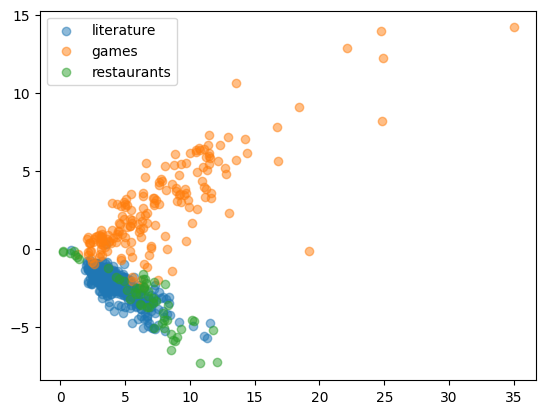

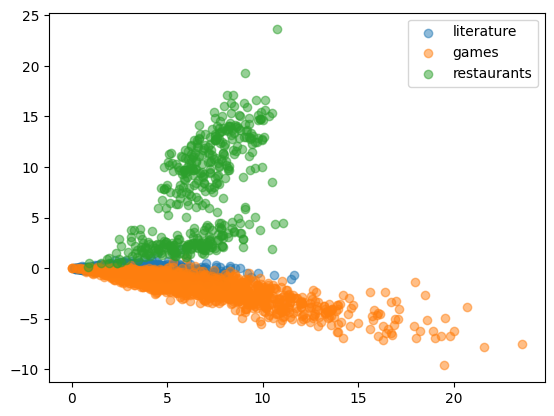

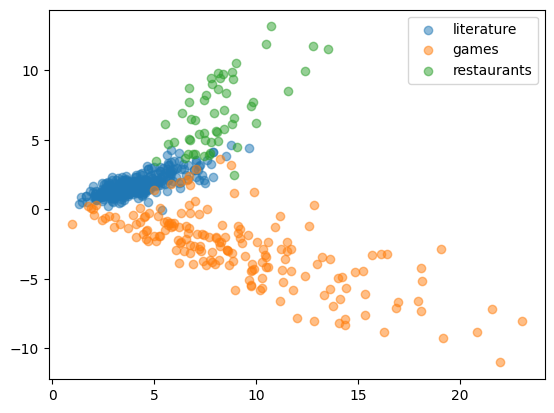

In [7]:

# Oppgave 2 b) Visualisering
scatter_plot(dev_vec, dev_labels)
scatter_plot(train_vec, train_labels)
scatter_plot(test_vec, test_labels)

# Din kode for å visualisere treningsdataene ved hjelp av  scatter_plot()

### Oppgave 2 b) Tekstbesvarelse
*Beskriv og diskuter hva du ser i plottet.*

Jeg ser at kategoriene er ganske i hverandre og ikke er adskilt fra hverandre

## Opppgave 2 c) Vekting
For å få bedre representasjoner kan det være lurt å vekte trekkene i ordvektorene,
slik at de trekkene som er mer informative gis høyere vekt. Vi skal se på en type
vekting kalt *term frequency–inverse document frequency (tf-idf)*. Scikit-learn
har en innebygd klasse for tf-idf kalt `TfidfTransformer` som vi skal bruke.
Den tar dokumentvektorer som input og gir ut nye vektorer som output. I
likhet med CountVectorizer må denne tilpasses treningssettet med fit() eller
fit_transform() før vi kan ta den i bruk (fordi vi først må gjøre de nødvendige
frekvenstellingene i korpuset).
- Lag en tf-idf-vektet representasjon av dokumentene
- Visualiser treningsvektorene som er vektet med tf-idf. Ser du
noen forskjell mellom vektorene med og uten tf-idf?

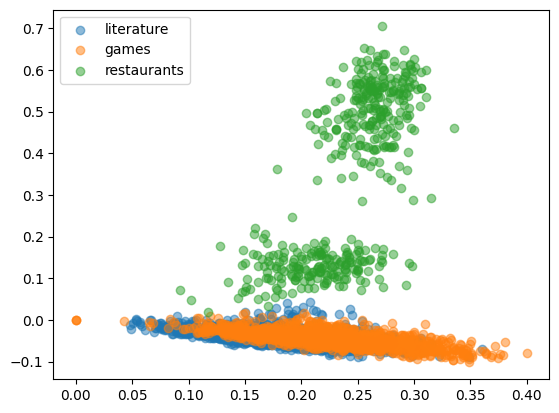

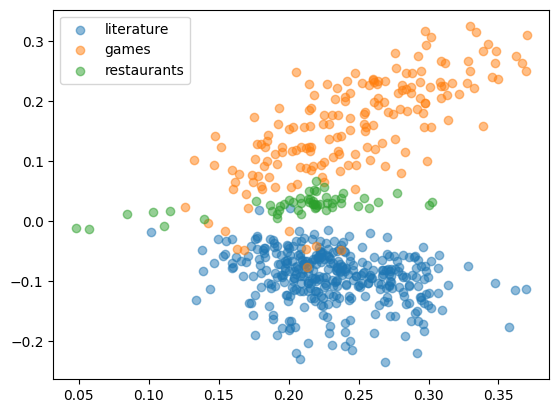

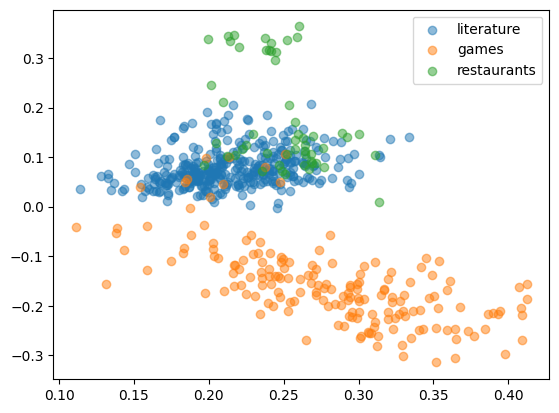

In [8]:
## Opppgave 2 c) Vekting, din kode:
tfifdf_transformer = TfidfTransformer() # Instans av TfidfTransformer
tfifdf_transformer.fit_transform(train_vec) # Tren instansen på våre data
train_vec_tfidf = tfifdf_transformer.transform(train_vec) # Treningsdata tf-idf-transformert
dev_vec_tfidf = tfifdf_transformer.transform(dev_vec) # Dev-data tf-idf-transformert
test_vec_tfidf = tfifdf_transformer.transform(test_vec) # Testdata tf-idf-transformert

# Din kode for å visualisere tf-idf-transformerte treningsdata:

scatter_plot(train_vec_tfidf, train_labels)
scatter_plot(dev_vec_tfidf, dev_labels)
scatter_plot(test_vec_tfidf, test_labels)

### Oppgave 2 c) Tekstbesvarelse
*Ser du noen forskjell mellom vektorene med og uten tf-idf?*

Med tfidf ser vi at kategoriene er mer adskilt

# Oppgave 3: Klassifisering
Vi skal bruke k-NN for å predikere hvilken kategori dokumentene i valideringssettet og testsettet tilhører ved hjelp av `KNeighborsClassifier` fra scikit-learn.
Klassifikatoren trenes med fit() på treningsdataene og kan brukes for å predikere med predict() på testdata. For best resultat er det viktig at trenings- og
testdataene er pre-prosessert på samme måte. F.eks. vil en klassifikator trent
uten tf-idf gi dårlige resultater for dokumentvektorer med tf-idf. 
#### Hyper-parameter tuning
Ved å endre på verdien av k kan man tilpasse klassifikatoren. Avhengig av datasett, preprosessering og vekting vil forskjellige verdier av k kunne gi forskjeller i ytelse. *K* er en hyperparameter i dette maskinlæringsprosjektet, og vi skal øve på å finne beste hyperparameter, ved å prøve en rekke alternativer for å se hva som gir best resultat. Det er her dev-settet kommer inn som et midlertidig testsett mens vi utvikler beste modell. Siden vi definerer "beste modell" som den som gjør det best på dev-settet, er det viktig at vi sparer det endelige testsettet til slutt, slik at vi ser hvordan modellen fungerer på data som vi ikke har brukt på noe trinn i utviklingen av modellen.

### a) k-NN
Lag en instans av KNeighborsClassifier der k = 3. Tren denne på treningsdata, og test på dev-data ved hjelp av accuracy_score

### b) Evaluering
Et vanlig brukt mål får å evaluere en klassifikator er accuracy. Vi kan beregne
dette ved hjelp av funksjonen `accuracy_score()` fra scikit-learn. Den tar to
argumenter: en liste med sanne merkelapper og en med predikerte merkelapper.
De sanne merkelappene er listen over kategorier for hvert dokument som vi
fikk fra NoReC (altså såkalte ‘gull-standard’ merkelapper), mens de predikerte
er modellens egne som vi får fra predict(). 

**Hyper-parameter tuning:** 
Lag ei sløyfe som trener en klassifikator for forskjellige verdier av k med og uten tf-idf, 
og beregn accuracy for hver av dem. Du kan f.eks. teste med k fra 1 til 20. 
- Inkluder en tabell med resultatene i rapporten.
- Diskuter resultatene dine. Hvilken kombinasjon av vekting og k-
verdi gir best accuracy?

In [9]:
# Oppgave 3 a) Din koding:

# Lag en instans av KNeighborsClassifier der k = 3:
k = 3
knn_clf = KNeighborsClassifier(k)
# Tren denne på treningsdata:
knn_clf.fit(train_vec_tfidf, train_labels)

# Test klassifikatoren ved hjelp av accuracy_score():
x = knn_clf.predict(dev_vec_tfidf)
print(accuracy_score(x, dev_labels))

0.3178694158075601


In [10]:
# Oppgave 3 b) Din koding:
"""Lag ei sløyfe som trener en klassifikator for forskjellige verdier av k med og uten tf-
idf, og beregn accuracy for hver av dem:"""
import random
import time
import pandas as pd

k_verdier = list(range(1,21))


def opprette_knn(k, vec, label):
    knn_clf = KNeighborsClassifier(k)
    knn_clf.fit(vec, label)

    return knn_clf

def KNN_Predict(vec, label, pred):
    scores = []
    start_tid = time.time()
    for k in k_verdier:
        knn = opprette_knn(k, vec, label)
        predikert = knn.predict(pred)
        scores.append(accuracy_score(predikert, dev_labels))
        # print(f"k={k},","{:.4f}".format(accuracy_score(predikert, dev_labels)))
    slutt_tid = time.time()
    print("Tid brukt på å finne accuracy:", slutt_tid-start_tid)
    return scores

print("KNN-klassifikator med tfidf vekting:")
scores_tfidf = KNN_Predict(train_vec_tfidf, train_labels, dev_vec_tfidf)
results_tfidf = pd.DataFrame({"k": k_verdier, "accuracy scores": scores_tfidf})
print("\n", results_tfidf)

print("\nKNN-klassifikator uten tfidf vekting:")
scores = KNN_Predict(train_vec, train_labels, dev_vec)
results = pd.DataFrame({"k" : k_verdier, "accuracy scores": scores})
print("\n",results)





KNN-klassifikator med tfidf vekting:
Tid brukt på å finne accuracy: 164.89876174926758

      k  accuracy scores
0    1         0.329897
1    2         0.317869
2    3         0.317869
3    4         0.314433
4    5         0.314433
5    6         0.310997
6    7         0.927835
7    8         0.924399
8    9         0.963918
9   10         0.957045
10  11         0.977663
11  12         0.977663
12  13         0.984536
13  14         0.984536
14  15         0.986254
15  16         0.984536
16  17         0.987973
17  18         0.982818
18  19         0.987973
19  20         0.982818

KNN-klassifikator uten tfidf vekting:
Tid brukt på å finne accuracy: 10.628581523895264

      k  accuracy scores
0    1         0.609966
1    2         0.510309
2    3         0.505155
3    4         0.460481
4    5         0.453608
5    6         0.417526
6    7         0.762887
7    8         0.761168
8    9         0.754296
9   10         0.762887
10  11         0.752577
11  12         0.756014
12  

### Oppgave 3b Tekstbesvarelse
- Inkluder en tabell med resultatene i rapporten.
- Diskuter resultatene dine. Hvilken kombinasjon av vekting og k-verdi gir best accuracy?

In [11]:
print("KNN-klassifikator med tfidf vekting:")
results_tfidf = pd.DataFrame({"k": k_verdier, "accuracy scores": scores_tfidf})
print("\n", results_tfidf)

print("\nKNN-klassifikator uten tfidf vekting:")
results = pd.DataFrame({"k" : k_verdier, "accuracy scores": scores})
print("\n",results)

"""
Den beste kombinasjonen var høy k-verdi (20) og med tfidf, fikk da 0,9828 i accuracy score
"""

KNN-klassifikator med tfidf vekting:

      k  accuracy scores
0    1         0.329897
1    2         0.317869
2    3         0.317869
3    4         0.314433
4    5         0.314433
5    6         0.310997
6    7         0.927835
7    8         0.924399
8    9         0.963918
9   10         0.957045
10  11         0.977663
11  12         0.977663
12  13         0.984536
13  14         0.984536
14  15         0.986254
15  16         0.984536
16  17         0.987973
17  18         0.982818
18  19         0.987973
19  20         0.982818

KNN-klassifikator uten tfidf vekting:

      k  accuracy scores
0    1         0.609966
1    2         0.510309
2    3         0.505155
3    4         0.460481
4    5         0.453608
5    6         0.417526
6    7         0.762887
7    8         0.761168
8    9         0.754296
9   10         0.762887
10  11         0.752577
11  12         0.756014
12  13         0.740550
13  14         0.749141
14  15         0.740550
15  16         0.743986
16  17  

'\nDen beste kombinasjonen var høy k-verdi (20) og med tfidf, fikk da 0,9828 i accuracy score\n'

Vi ser at jo høyere k-verdi dvi gir inn jo bedre blir accuracy. Den som gir best accuracy er k-verdien 18 og 20. For tfidf tar det lenger tid å finne accuracy mens på den uten tar det mye kortere tid.

## Oppgave 3 c) Testing
Vi har tilpasset parameterene til klassifikatoren vår til valideringssettet og nå
ønsker vi å gjøre en siste evaluering på testsettet. For å få mest mulig realistiske
og representative resultater er det viktig at vi venter med dette helt til slutt,
slik at vi ikke tilpasser klassifikatoren testsettet. Fordi vi vil teste hvor bra
klassifikatoren vår kan generalisere til nye data, må vi være nøye på at det
reserverte testsettet er nettopp dette – nye data som ikke har påvirket de valgene
vi har tatt for klassifikatoren vår.

- Tren en klassifikator med samme valg for k-verdi og vekting (tf-idf
eller ikke) som den med høyest accuracy i forrige deloppgave.
- Test på tilsvarende representasjon av test-settet
- Hvordan er ytelsen på testsettet sammenlignet med valideringssettet?

In [12]:
# Din kode for trening av modell med beste parametre, og teste på test-settet
k = 20
knn_clf = KNeighborsClassifier(k)
# Tren denne på treningsdata:
knn_clf.fit(train_vec_tfidf, train_labels)

# Test klassifikatoren ved hjelp av accuracy_score():
x = knn_clf.predict(test_vec_tfidf)
print("accuracy på test settet {:.4f}".format(accuracy_score(x, test_labels)))

accuracy på test settet 0.9828


### Oppgave 3c Tekstbesvarelse
*Hvordan er ytelsen på testsettet sammenlignet med valideringssettet?*



Når vi sammenlikner ytelsen på testsettet og valideringssettet ser vi at det er veldig likt, vi får samme accuracy på både testsettet og valideringssettet. Fra dette kan vi få en indikasjon på hvor godt klasifikatoren kan generalisere til nye data. Hvis ytelsen på testsettet er like ytelsen på valideringssettet kan vi si at klasifikatoren har generalisert godt.